In [5]:
import glob
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [50]:
# Read filenames, excluding label file. Note single digit file names have been renamed (n to 0n) to preserve order.
filenames = glob.glob('*.dat')
filenames = filenames[:-1]

for i in range(len(filenames)):
    if len(filenames[i]) == 13:
        filenames[i] = filenames[i][:8] + '0' + filenames[i][8:]

filenames.sort()
print(filenames)

['channel_01.dat', 'channel_02.dat', 'channel_03.dat', 'channel_04.dat', 'channel_05.dat', 'channel_06.dat', 'channel_07.dat', 'channel_08.dat', 'channel_09.dat', 'channel_10.dat', 'channel_11.dat', 'channel_12.dat', 'channel_13.dat', 'channel_14.dat', 'channel_15.dat', 'channel_16.dat', 'channel_17.dat', 'channel_18.dat', 'channel_19.dat', 'channel_20.dat']


In [7]:
# Extract list of labels from file
df_labels = pd.read_csv('labels.dat', names = ['Labels'])
labels = df_labels['Labels'].tolist()

for i in range(9):
    labels[i] = '0' + labels[i]

print(labels)

['01 mains', '02 mains', '03 oven', '04 oven', '05 refrigerator', '06 dishwaser', '07 kitchen_outlets', '08 kitchen_outlets', '09 lighting', '10 washer_dryer', '11 microwave', '12 bathroom_gfi', '13 electric_heat', '14 stove', '15 kitchen_outlets', '16 kitchen_outlets', '17 lighting', '18 lighting', '19 washer_dryer', '20 washer_dryer']


In [8]:
# Create list of all channels with date and power labelled
column_names = ['Date','Power']
df_all_list = [pd.read_csv(file,sep = ' ',names = column_names) for file in filenames]

# Create dictionary of labels and their corresponding dataframes
df_dict = dict(zip(labels,df_all_list))

# View shape of each dataframe
for key in df_dict:
    print(key, df_dict[key].shape)

01 mains (1561660, 2)
02 mains (1561660, 2)
03 oven (745878, 2)
04 oven (745878, 2)
05 refrigerator (745878, 2)
06 dishwaser (745878, 2)
07 kitchen_outlets (745878, 2)
08 kitchen_outlets (745878, 2)
09 lighting (745878, 2)
10 washer_dryer (745878, 2)
11 microwave (745878, 2)
12 bathroom_gfi (745878, 2)
13 electric_heat (745878, 2)
14 stove (745878, 2)
15 kitchen_outlets (745878, 2)
16 kitchen_outlets (745878, 2)
17 lighting (745878, 2)
18 lighting (745878, 2)
19 washer_dryer (745878, 2)
20 washer_dryer (745878, 2)


In [9]:
for key in df_dict:
    
    # Convert integer dates to datetime and set as index
    df_dict[key]['Date'] = pd.to_datetime(df_dict[key]['Date'],unit = 's')
    df_dict[key] = df_dict[key].set_index(['Date'])
    
    # Relabel Power column as the source label
    df_dict[key].columns = [key]

In [10]:
# Create dataframe of mains signals
df_mains = pd.concat([df_dict[label] for label in labels[:2]], axis = 1)

# Create dataframe of other channel signals
df_channels = pd.concat([df_dict[label] for label in labels[2:]], axis = 1)

# Create dataframe with everything using inner join (only keep rows where index appears in all frames)
df_total = pd.concat([df_mains, df_channels], axis = 1, join = 'inner')

In [11]:
df_total.head()

,01 mains,02 mains,03 oven,04 oven,05 refrigerator,06 dishwaser,07 kitchen_outlets,08 kitchen_outlets,09 lighting,10 washer_dryer,11 microwave,12 bathroom_gfi,13 electric_heat,14 stove,15 kitchen_outlets,16 kitchen_outlets,17 lighting,18 lighting,19 washer_dryer,20 washer_dryer
Date,,,,,,,,,,,,,,,,,,,,
2011-04-18 13:22:13,222.20,118.83,0.0,0.0,6.0,0.0,34.0,21.0,81.0,0.0,5.0,1.0,0.0,0.0,2.0,0.0,65.0,46.0,0.0,0.0
2011-04-18 13:22:16,223.17,119.19,0.0,0.0,6.0,0.0,34.0,21.0,81.0,0.0,5.0,1.0,0.0,0.0,2.0,0.0,65.0,46.0,0.0,0.0
2011-04-18 13:22:20,223.60,118.92,0.0,0.0,6.0,0.0,34.0,22.0,81.0,0.0,5.0,1.0,0.0,0.0,2.0,0.0,65.0,46.0,0.0,0.0
2011-04-18 13:22:23,222.91,119.16,0.0,0.0,6.0,1.0,35.0,21.0,81.0,0.0,5.0,1.0,0.0,0.0,1.0,0.0,65.0,46.0,0.0,0.0
2011-04-18 13:22:26,222.94,118.83,0.0,0.0,6.0,0.0,34.0,21.0,81.0,0.0,5.0,1.0,0.0,0.0,2.0,0.0,65.0,46.0,0.0,0.0


In [12]:
df_total['00 mains total'] = df_total['01 mains'] + df_total['02 mains']
df_total.head()

,01 mains,02 mains,03 oven,04 oven,05 refrigerator,06 dishwaser,07 kitchen_outlets,08 kitchen_outlets,09 lighting,10 washer_dryer,...,12 bathroom_gfi,13 electric_heat,14 stove,15 kitchen_outlets,16 kitchen_outlets,17 lighting,18 lighting,19 washer_dryer,20 washer_dryer,00 mains total
Date,,,,,,,,,,,,,,,,,,,,,
2011-04-18 13:22:13,222.20,118.83,0.0,0.0,6.0,0.0,34.0,21.0,81.0,0.0,...,1.0,0.0,0.0,2.0,0.0,65.0,46.0,0.0,0.0,341.03
2011-04-18 13:22:16,223.17,119.19,0.0,0.0,6.0,0.0,34.0,21.0,81.0,0.0,...,1.0,0.0,0.0,2.0,0.0,65.0,46.0,0.0,0.0,342.36
2011-04-18 13:22:20,223.60,118.92,0.0,0.0,6.0,0.0,34.0,22.0,81.0,0.0,...,1.0,0.0,0.0,2.0,0.0,65.0,46.0,0.0,0.0,342.52
2011-04-18 13:22:23,222.91,119.16,0.0,0.0,6.0,1.0,35.0,21.0,81.0,0.0,...,1.0,0.0,0.0,1.0,0.0,65.0,46.0,0.0,0.0,342.07
2011-04-18 13:22:26,222.94,118.83,0.0,0.0,6.0,0.0,34.0,21.0,81.0,0.0,...,1.0,0.0,0.0,2.0,0.0,65.0,46.0,0.0,0.0,341.77


In [15]:
df_onoff = df_total.copy()
df_onoff = df_onoff.sort_index(axis=1)
df_onoff = df_onoff.drop(['01 mains', '02 mains'], axis = 1)
df_onoff.iloc[:,1:] = df_onoff.iloc[:,1:] > 0
df_onoff.head()

,00 mains total,03 oven,04 oven,05 refrigerator,06 dishwaser,07 kitchen_outlets,08 kitchen_outlets,09 lighting,10 washer_dryer,11 microwave,12 bathroom_gfi,13 electric_heat,14 stove,15 kitchen_outlets,16 kitchen_outlets,17 lighting,18 lighting,19 washer_dryer,20 washer_dryer
Date,,,,,,,,,,,,,,,,,,,
2011-04-18 13:22:13,341.03,False,False,True,False,True,True,True,False,True,True,False,False,True,False,True,True,False,False
2011-04-18 13:22:16,342.36,False,False,True,False,True,True,True,False,True,True,False,False,True,False,True,True,False,False
2011-04-18 13:22:20,342.52,False,False,True,False,True,True,True,False,True,True,False,False,True,False,True,True,False,False
2011-04-18 13:22:23,342.07,False,False,True,True,True,True,True,False,True,True,False,False,True,False,True,True,False,False
2011-04-18 13:22:26,341.77,False,False,True,False,True,True,True,False,True,True,False,False,True,False,True,True,False,False


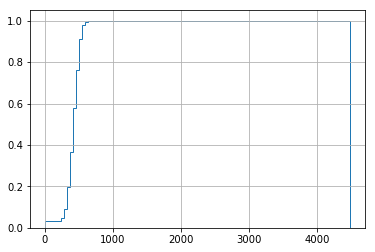

In [35]:
df_total['10 washer_dryer'][df_total['10 washer_dryer'] > 10 & ].hist(cumulative=True, normed=1, bins=100, histtype='step')
plt.show()

In [21]:
df_washerdryer = df_onoff[['00 mains total', '10 washer_dryer']].copy()
df_washerdryer.head()

,00 mains total,10 washer_dryer
Date,,
2011-04-18 13:22:13,341.03,False
2011-04-18 13:22:16,342.36,False
2011-04-18 13:22:20,342.52,False
2011-04-18 13:22:23,342.07,False
2011-04-18 13:22:26,341.77,False


In [22]:
# Create time series column t
df_washerdryer['t'] = df_washerdryer['00 mains total']

# Create shifted time series columns t-1 to t-9
for i in range(1,10):
    df_washerdryer['t-' + str(i)] = df_washerdryer['00 mains total'].shift(i)

# Drop original mains column    
df_washerdryer = df_washerdryer.drop(['00 mains total'], axis = 1)

# Display washer_dryer values as integers for clarity
df_washerdryer['10 washer_dryer'] = df_washerdryer['10 washer_dryer'].astype(int)

df_washerdryer.head()

,10 washer_dryer,t,t-1,t-2,t-3,t-4,t-5,t-6,t-7,t-8,t-9
Date,,,,,,,,,,,
2011-04-18 13:22:13,0,341.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-04-18 13:22:16,0,342.36,341.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-04-18 13:22:20,0,342.52,342.36,341.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-04-18 13:22:23,0,342.07,342.52,342.36,341.03,NaN,NaN,NaN,NaN,NaN,NaN
2011-04-18 13:22:26,0,341.77,342.07,342.52,342.36,341.03,NaN,NaN,NaN,NaN,NaN


In [23]:
df_washerdryer.shape

(406748, 11)

In [24]:
df_washerdryer.iloc[:,1:] = df_washerdryer.iloc[:,1:].replace(0,np.nan)
df_washerdryer = df_washerdryer.dropna(how = 'any')
df_washerdryer.shape

(406739, 11)

In [25]:
X = df_washerdryer.drop(['10 washer_dryer'], axis = 1)
Y = df_washerdryer['10 washer_dryer']

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB # Gaussian Naive Bays
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier #stochastic gradient descent
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

In [30]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log
acc_log_test = round(logreg.score(X_test, Y_test) * 100, 2)

In [29]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

98.569999999999993

In [31]:
acc_log_test

95.480000000000004

In [32]:
round(knn.score(X_test, Y_test) * 100, 2)

97.670000000000002